# Personal Budget Violation Prediction

In [34]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings('ignore')

In [36]:
df=pd.read_csv(r"C:\Users\sunu\Desktop\Tom\Techolas Data Science\ML_Project\balanced_budget_violation.csv")
df

,Income,Age,Dependents,Occupation,City_Tier,Rent,Loan_Repayment,Insurance,Groceries,Transport,...,Potential_Savings_Groceries,Potential_Savings_Transport,Potential_Savings_Eating_Out,Potential_Savings_Entertainment,Potential_Savings_Utilities,Potential_Savings_Healthcare,Potential_Savings_Education,Potential_Savings_Miscellaneous,Total_Expenses,BudgetViolation
0,20228.115621,25,3,Professional,Tier_1,6068.434686,3447.182025,957.799348,2451.277188,1370.610870,...,510.310692,165.077210,83.744751,98.800989,95.515549,31.489224,38.391700,59.655935,20252.185158,Above
1,57909.767101,48,1,Student,Tier_2,11581.953420,10226.304214,1779.731383,6597.998828,3097.377606,...,1494.631577,392.219427,384.643375,318.256628,535.409525,54.112563,113.003104,382.547666,45815.663545,Below
2,10058.648510,28,1,Retired,Tier_1,3017.594553,0.000000,366.027458,1375.824817,795.840751,...,99.571453,192.948787,134.878357,50.963114,141.935830,1.636342,28.024098,31.780205,8664.708030,Below
3,34704.729633,53,1,Professional,Tier_1,10411.418890,6928.178523,1190.230196,4765.128511,2348.859695,...,1229.991444,423.773985,226.787296,115.445815,605.688359,16.309551,97.192158,240.818473,35259.388764,Above
4,75802.479283,21,4,Self_Employed,Tier_2,15160.495857,0.000000,3195.738830,9200.597573,4791.091919,...,613.447266,1274.667799,330.151212,418.092590,335.114152,49.882758,73.419237,128.100301,50593.598682,Below
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227,61972.690323,37,1,Student,Tier_1,18591.807097,0.000000,2926.895173,7073.232038,3575.799423,...,2043.057614,894.126563,502.010738,177.309203,717.614481,4.134936,77.681122,394.448748,48654.745561,Below
228,26665.791312,40,4,Retired,Tier_2,5333.158262,3808.856140,637.131577,3750.205660,1641.653755,...,211.926492,215.208513,274.269670,151.393294,211.334631,3.912500,19.306189,40.519176,22058.719400,Below
229,77548.161619,42,4,Student,Tier_1,23264.448486,0.000000,3387.217832,10491.684067,5819.838040,...,1868.970627,1410.398341,368.197097,635.291729,1172.456555,5.365573,333.887335,436.216889,65040.848473,Below
230,13343.760949,61,3,Student,Tier_1,4003.128285,2238.854269,371.524660,1973.626190,939.228297,...,418.137289,174.249910,78.410860,130.504214,263.438814,4.872579,49.368579,25.640599,13344.736065,Above


# EDA ; Exploratory Data Analysis

In [39]:
df.isna().sum()

Income                             0
Age                                0
Dependents                         0
Occupation                         0
City_Tier                          0
Rent                               0
Loan_Repayment                     0
Insurance                          0
Groceries                          0
Transport                          0
Eating_Out                         0
Entertainment                      0
Utilities                          0
Healthcare                         0
Education                          0
Miscellaneous                      0
Desired_Savings_Percentage         0
Desired_Savings                    0
Disposable_Income                  0
Potential_Savings_Groceries        0
Potential_Savings_Transport        0
Potential_Savings_Eating_Out       0
Potential_Savings_Entertainment    0
Potential_Savings_Utilities        0
Potential_Savings_Healthcare       0
Potential_Savings_Education        0
Potential_Savings_Miscellaneous    0
T

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232 entries, 0 to 231
Data columns (total 29 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Income                           232 non-null    float64
 1   Age                              232 non-null    int64  
 2   Dependents                       232 non-null    int64  
 3   Occupation                       232 non-null    object 
 4   City_Tier                        232 non-null    object 
 5   Rent                             232 non-null    float64
 6   Loan_Repayment                   232 non-null    float64
 7   Insurance                        232 non-null    float64
 8   Groceries                        232 non-null    float64
 9   Transport                        232 non-null    float64
 10  Eating_Out                       232 non-null    float64
 11  Entertainment                    232 non-null    float64
 12  Utilities             

In [43]:
df.describe()

,Income,Age,Dependents,Rent,Loan_Repayment,Insurance,Groceries,Transport,Eating_Out,Entertainment,...,Disposable_Income,Potential_Savings_Groceries,Potential_Savings_Transport,Potential_Savings_Eating_Out,Potential_Savings_Entertainment,Potential_Savings_Utilities,Potential_Savings_Healthcare,Potential_Savings_Education,Potential_Savings_Miscellaneous,Total_Expenses
count,232.000000,232.000000,232.000000,232.000000,232.000000,232.000000,232.000000,232.000000,232.000000,232.000000,...,232.000000,232.000000,232.000000,232.000000,232.000000,232.000000,232.000000,232.000000,232.000000,232.000000
mean,44933.806798,39.857759,2.275862,11433.701891,5403.007856,1660.556782,5831.266721,2938.558540,1672.538946,1635.208428,...,5422.238961,957.961744,514.903294,284.207362,293.541366,493.842182,45.388483,77.293073,162.745026,39511.567837
std,35857.172139,13.304022,1.279788,9661.005931,6451.571872,1378.977659,4700.686212,2379.996601,1389.620387,1435.149528,...,10274.518941,850.258351,478.402273,281.344013,330.098668,443.908790,50.540509,99.239790,163.795660,32444.309484
min,4313.739552,18.000000,0.000000,893.396793,0.000000,142.953790,516.851400,304.973223,166.704815,196.685932,...,-5400.788673,54.918390,28.274020,12.806460,15.055468,21.359540,0.018081,0.000000,7.730408,3997.329470
25%,19693.896632,28.000000,1.000000,5013.329254,0.000000,698.611757,2562.467826,1308.546121,674.448780,602.761932,...,-422.640988,325.069098,181.102979,97.434269,90.493851,164.775393,13.571549,14.670864,54.535525,17587.164254
50%,33370.499639,40.000000,2.000000,8269.436580,3590.473984,1205.928605,4280.512019,2117.353937,1224.120082,1156.021620,...,1213.481355,628.813310,381.027491,202.968655,178.169669,353.677052,29.639529,45.061072,107.003750,30169.238292
75%,61520.397122,51.000000,3.000000,15039.712460,6962.582153,2088.821713,7904.769796,4046.269744,2239.139807,2062.043688,...,7681.800858,1312.146531,700.667914,369.690953,365.940757,614.382414,61.082304,97.475539,198.999039,50464.453919
max,203341.145831,64.000000,4.000000,61002.343749,38057.888255,6947.058314,29246.307128,15917.401542,7699.002601,8130.489540,...,68850.869010,4735.068422,3658.515380,1645.573679,2198.770776,2711.719087,390.771802,592.927794,913.291272,205291.209704


In [45]:
df.head()

,Income,Age,Dependents,Occupation,City_Tier,Rent,Loan_Repayment,Insurance,Groceries,Transport,...,Potential_Savings_Groceries,Potential_Savings_Transport,Potential_Savings_Eating_Out,Potential_Savings_Entertainment,Potential_Savings_Utilities,Potential_Savings_Healthcare,Potential_Savings_Education,Potential_Savings_Miscellaneous,Total_Expenses,BudgetViolation
0,20228.115621,25,3,Professional,Tier_1,6068.434686,3447.182025,957.799348,2451.277188,1370.610870,...,510.310692,165.077210,83.744751,98.800989,95.515549,31.489224,38.391700,59.655935,20252.185158,Above
1,57909.767101,48,1,Student,Tier_2,11581.953420,10226.304214,1779.731383,6597.998828,3097.377606,...,1494.631577,392.219427,384.643375,318.256628,535.409525,54.112563,113.003104,382.547666,45815.663545,Below
2,10058.648510,28,1,Retired,Tier_1,3017.594553,0.000000,366.027458,1375.824817,795.840751,...,99.571453,192.948787,134.878357,50.963114,141.935830,1.636342,28.024098,31.780205,8664.708030,Below
3,34704.729633,53,1,Professional,Tier_1,10411.418890,6928.178523,1190.230196,4765.128511,2348.859695,...,1229.991444,423.773985,226.787296,115.445815,605.688359,16.309551,97.192158,240.818473,35259.388764,Above
4,75802.479283,21,4,Self_Employed,Tier_2,15160.495857,0.000000,3195.738830,9200.597573,4791.091919,...,613.447266,1274.667799,330.151212,418.092590,335.114152,49.882758,73.419237,128.100301,50593.598682,Below


In [47]:
df.tail()

,Income,Age,Dependents,Occupation,City_Tier,Rent,Loan_Repayment,Insurance,Groceries,Transport,...,Potential_Savings_Groceries,Potential_Savings_Transport,Potential_Savings_Eating_Out,Potential_Savings_Entertainment,Potential_Savings_Utilities,Potential_Savings_Healthcare,Potential_Savings_Education,Potential_Savings_Miscellaneous,Total_Expenses,BudgetViolation
227,61972.690323,37,1,Student,Tier_1,18591.807097,0.000000,2926.895173,7073.232038,3575.799423,...,2043.057614,894.126563,502.010738,177.309203,717.614481,4.134936,77.681122,394.448748,48654.745561,Below
228,26665.791312,40,4,Retired,Tier_2,5333.158262,3808.856140,637.131577,3750.205660,1641.653755,...,211.926492,215.208513,274.269670,151.393294,211.334631,3.912500,19.306189,40.519176,22058.719400,Below
229,77548.161619,42,4,Student,Tier_1,23264.448486,0.000000,3387.217832,10491.684067,5819.838040,...,1868.970627,1410.398341,368.197097,635.291729,1172.456555,5.365573,333.887335,436.216889,65040.848473,Below
230,13343.760949,61,3,Student,Tier_1,4003.128285,2238.854269,371.524660,1973.626190,939.228297,...,418.137289,174.249910,78.410860,130.504214,263.438814,4.872579,49.368579,25.640599,13344.736065,Above
231,8235.778970,26,4,Retired,Tier_3,1235.366845,0.000000,183.580124,837.164725,493.466760,...,57.372838,130.460171,39.027621,24.282360,72.331111,7.910664,6.623807,16.536418,4735.291434,Below


In [49]:
df.shape

(232, 29)

In [51]:
df['BudgetViolation'].value_counts()

BudgetViolation
Below    120
Above    112
Name: count, dtype: int64

In [53]:
df['Occupation'].value_counts()

Occupation
Student          66
Retired          62
Self_Employed    55
Professional     49
Name: count, dtype: int64

# Label Encoder

In [56]:
from sklearn.preprocessing import LabelEncoder
l=LabelEncoder()
df['BudgetViolation'] = l.fit_transform(df['BudgetViolation'])
df['Occupation']=l.fit_transform(df['Occupation'])
df['City_Tier']=l.fit_transform(df['City_Tier'])

In [58]:
df

,Income,Age,Dependents,Occupation,City_Tier,Rent,Loan_Repayment,Insurance,Groceries,Transport,...,Potential_Savings_Groceries,Potential_Savings_Transport,Potential_Savings_Eating_Out,Potential_Savings_Entertainment,Potential_Savings_Utilities,Potential_Savings_Healthcare,Potential_Savings_Education,Potential_Savings_Miscellaneous,Total_Expenses,BudgetViolation
0,20228.115621,25,3,0,0,6068.434686,3447.182025,957.799348,2451.277188,1370.610870,...,510.310692,165.077210,83.744751,98.800989,95.515549,31.489224,38.391700,59.655935,20252.185158,0
1,57909.767101,48,1,3,1,11581.953420,10226.304214,1779.731383,6597.998828,3097.377606,...,1494.631577,392.219427,384.643375,318.256628,535.409525,54.112563,113.003104,382.547666,45815.663545,1
2,10058.648510,28,1,1,0,3017.594553,0.000000,366.027458,1375.824817,795.840751,...,99.571453,192.948787,134.878357,50.963114,141.935830,1.636342,28.024098,31.780205,8664.708030,1
3,34704.729633,53,1,0,0,10411.418890,6928.178523,1190.230196,4765.128511,2348.859695,...,1229.991444,423.773985,226.787296,115.445815,605.688359,16.309551,97.192158,240.818473,35259.388764,0
4,75802.479283,21,4,2,1,15160.495857,0.000000,3195.738830,9200.597573,4791.091919,...,613.447266,1274.667799,330.151212,418.092590,335.114152,49.882758,73.419237,128.100301,50593.598682,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227,61972.690323,37,1,3,0,18591.807097,0.000000,2926.895173,7073.232038,3575.799423,...,2043.057614,894.126563,502.010738,177.309203,717.614481,4.134936,77.681122,394.448748,48654.745561,1
228,26665.791312,40,4,1,1,5333.158262,3808.856140,637.131577,3750.205660,1641.653755,...,211.926492,215.208513,274.269670,151.393294,211.334631,3.912500,19.306189,40.519176,22058.719400,1
229,77548.161619,42,4,3,0,23264.448486,0.000000,3387.217832,10491.684067,5819.838040,...,1868.970627,1410.398341,368.197097,635.291729,1172.456555,5.365573,333.887335,436.216889,65040.848473,1
230,13343.760949,61,3,3,0,4003.128285,2238.854269,371.524660,1973.626190,939.228297,...,418.137289,174.249910,78.410860,130.504214,263.438814,4.872579,49.368579,25.640599,13344.736065,0


In [60]:
df_num = df.select_dtypes(include = ['float64', 'int64','int32'])
df_num.head()

,Income,Age,Dependents,Occupation,City_Tier,Rent,Loan_Repayment,Insurance,Groceries,Transport,...,Potential_Savings_Groceries,Potential_Savings_Transport,Potential_Savings_Eating_Out,Potential_Savings_Entertainment,Potential_Savings_Utilities,Potential_Savings_Healthcare,Potential_Savings_Education,Potential_Savings_Miscellaneous,Total_Expenses,BudgetViolation
0,20228.115621,25,3,0,0,6068.434686,3447.182025,957.799348,2451.277188,1370.610870,...,510.310692,165.077210,83.744751,98.800989,95.515549,31.489224,38.391700,59.655935,20252.185158,0
1,57909.767101,48,1,3,1,11581.953420,10226.304214,1779.731383,6597.998828,3097.377606,...,1494.631577,392.219427,384.643375,318.256628,535.409525,54.112563,113.003104,382.547666,45815.663545,1
2,10058.648510,28,1,1,0,3017.594553,0.000000,366.027458,1375.824817,795.840751,...,99.571453,192.948787,134.878357,50.963114,141.935830,1.636342,28.024098,31.780205,8664.708030,1
3,34704.729633,53,1,0,0,10411.418890,6928.178523,1190.230196,4765.128511,2348.859695,...,1229.991444,423.773985,226.787296,115.445815,605.688359,16.309551,97.192158,240.818473,35259.388764,0
4,75802.479283,21,4,2,1,15160.495857,0.000000,3195.738830,9200.597573,4791.091919,...,613.447266,1274.667799,330.151212,418.092590,335.114152,49.882758,73.419237,128.100301,50593.598682,1


<Axes: >

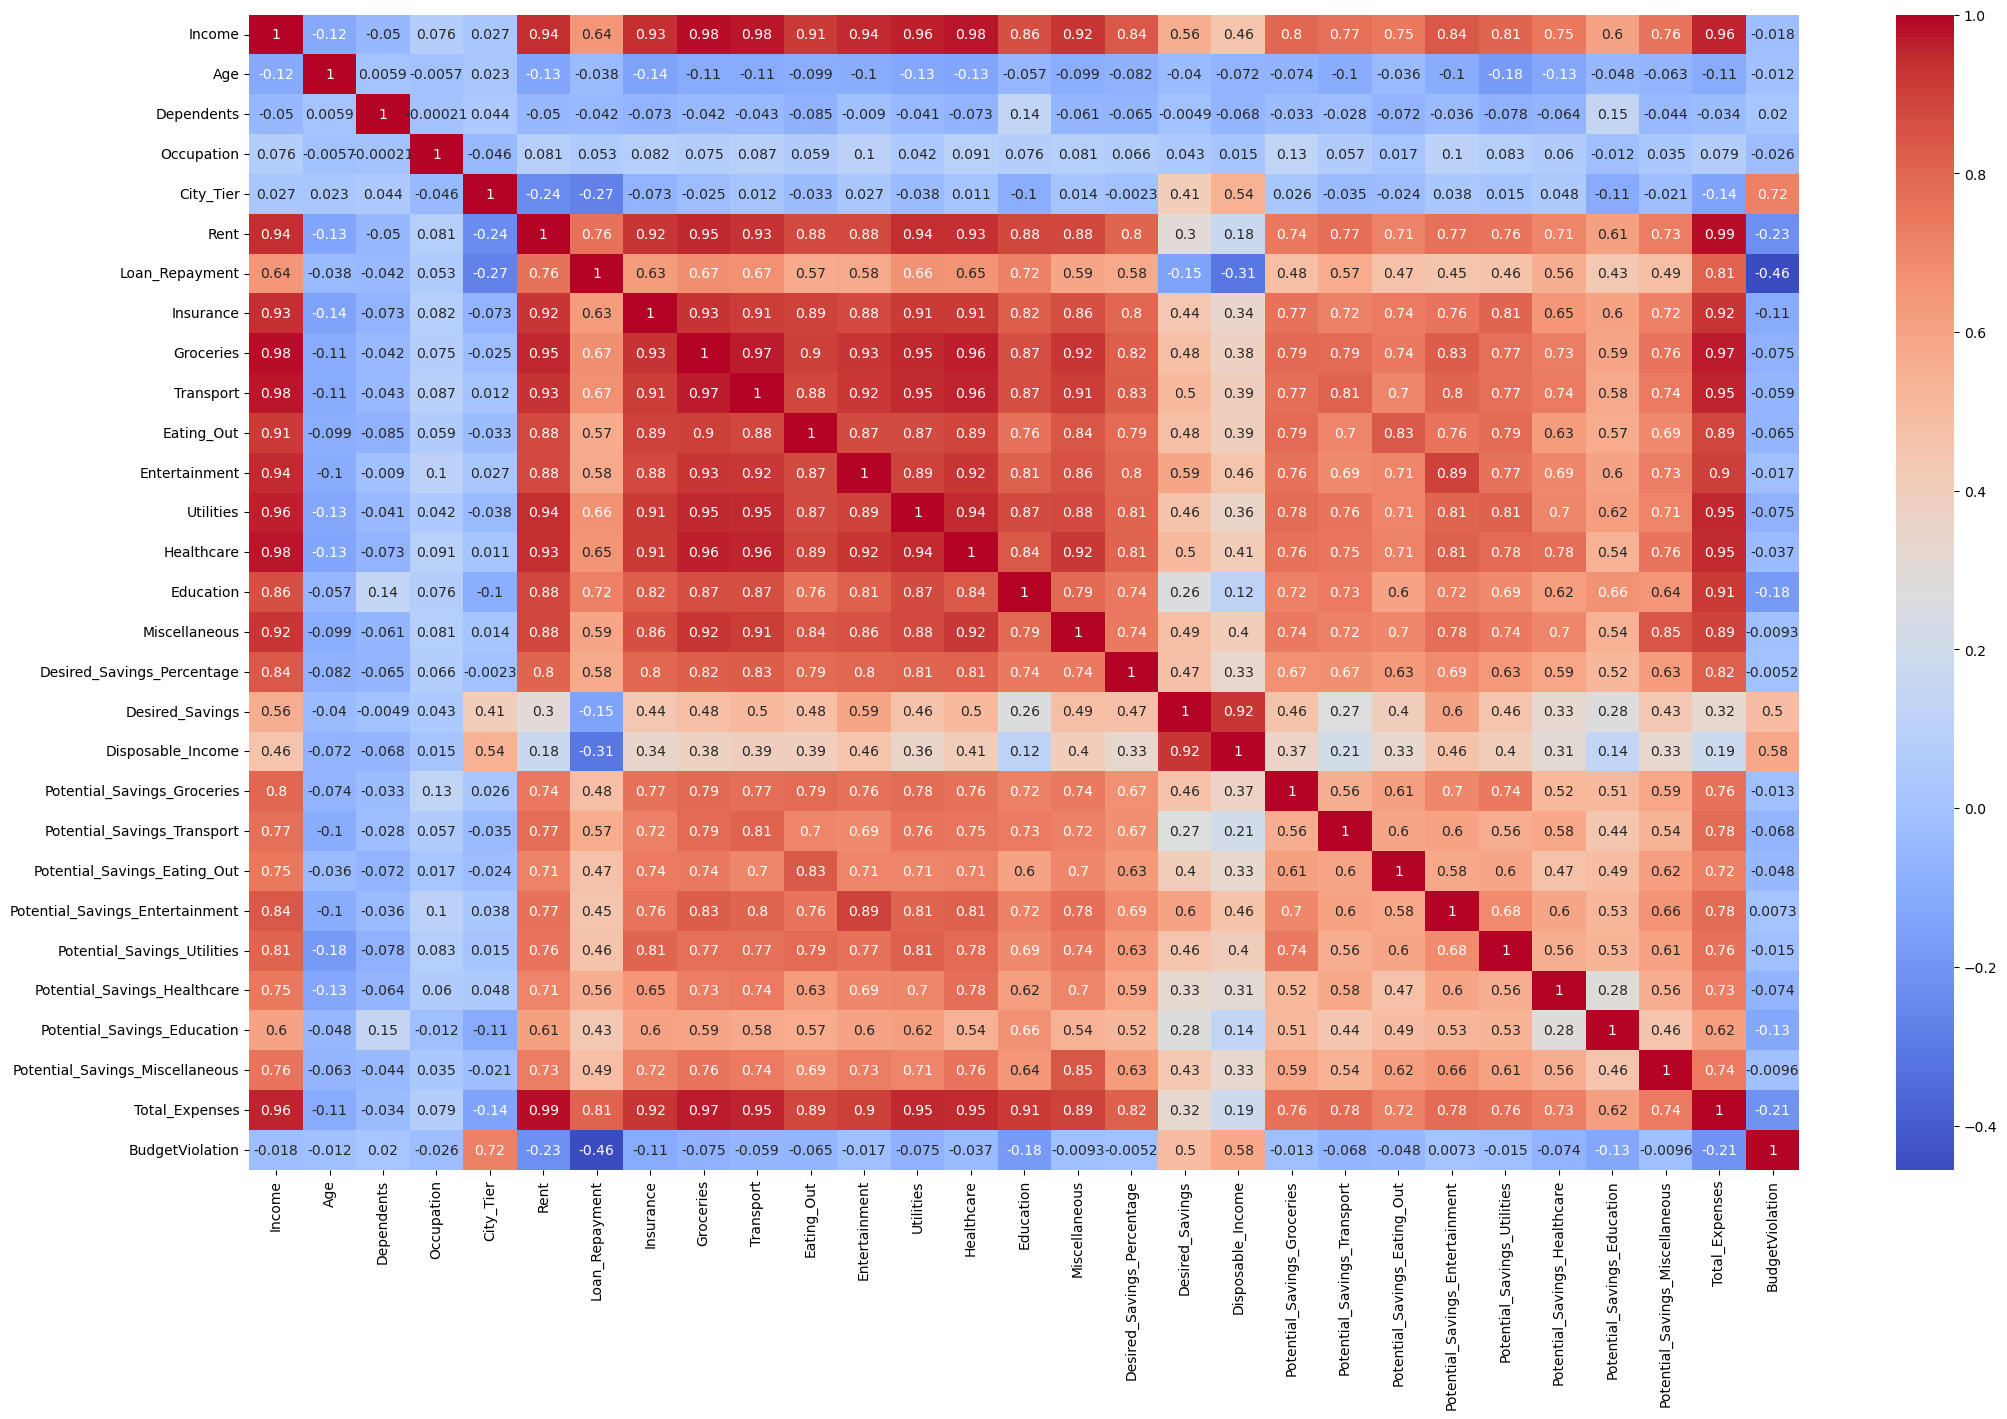

In [62]:
plt.figure(figsize=(25, 15))
sns.heatmap(df_num.corr(),annot=True,cmap='coolwarm')

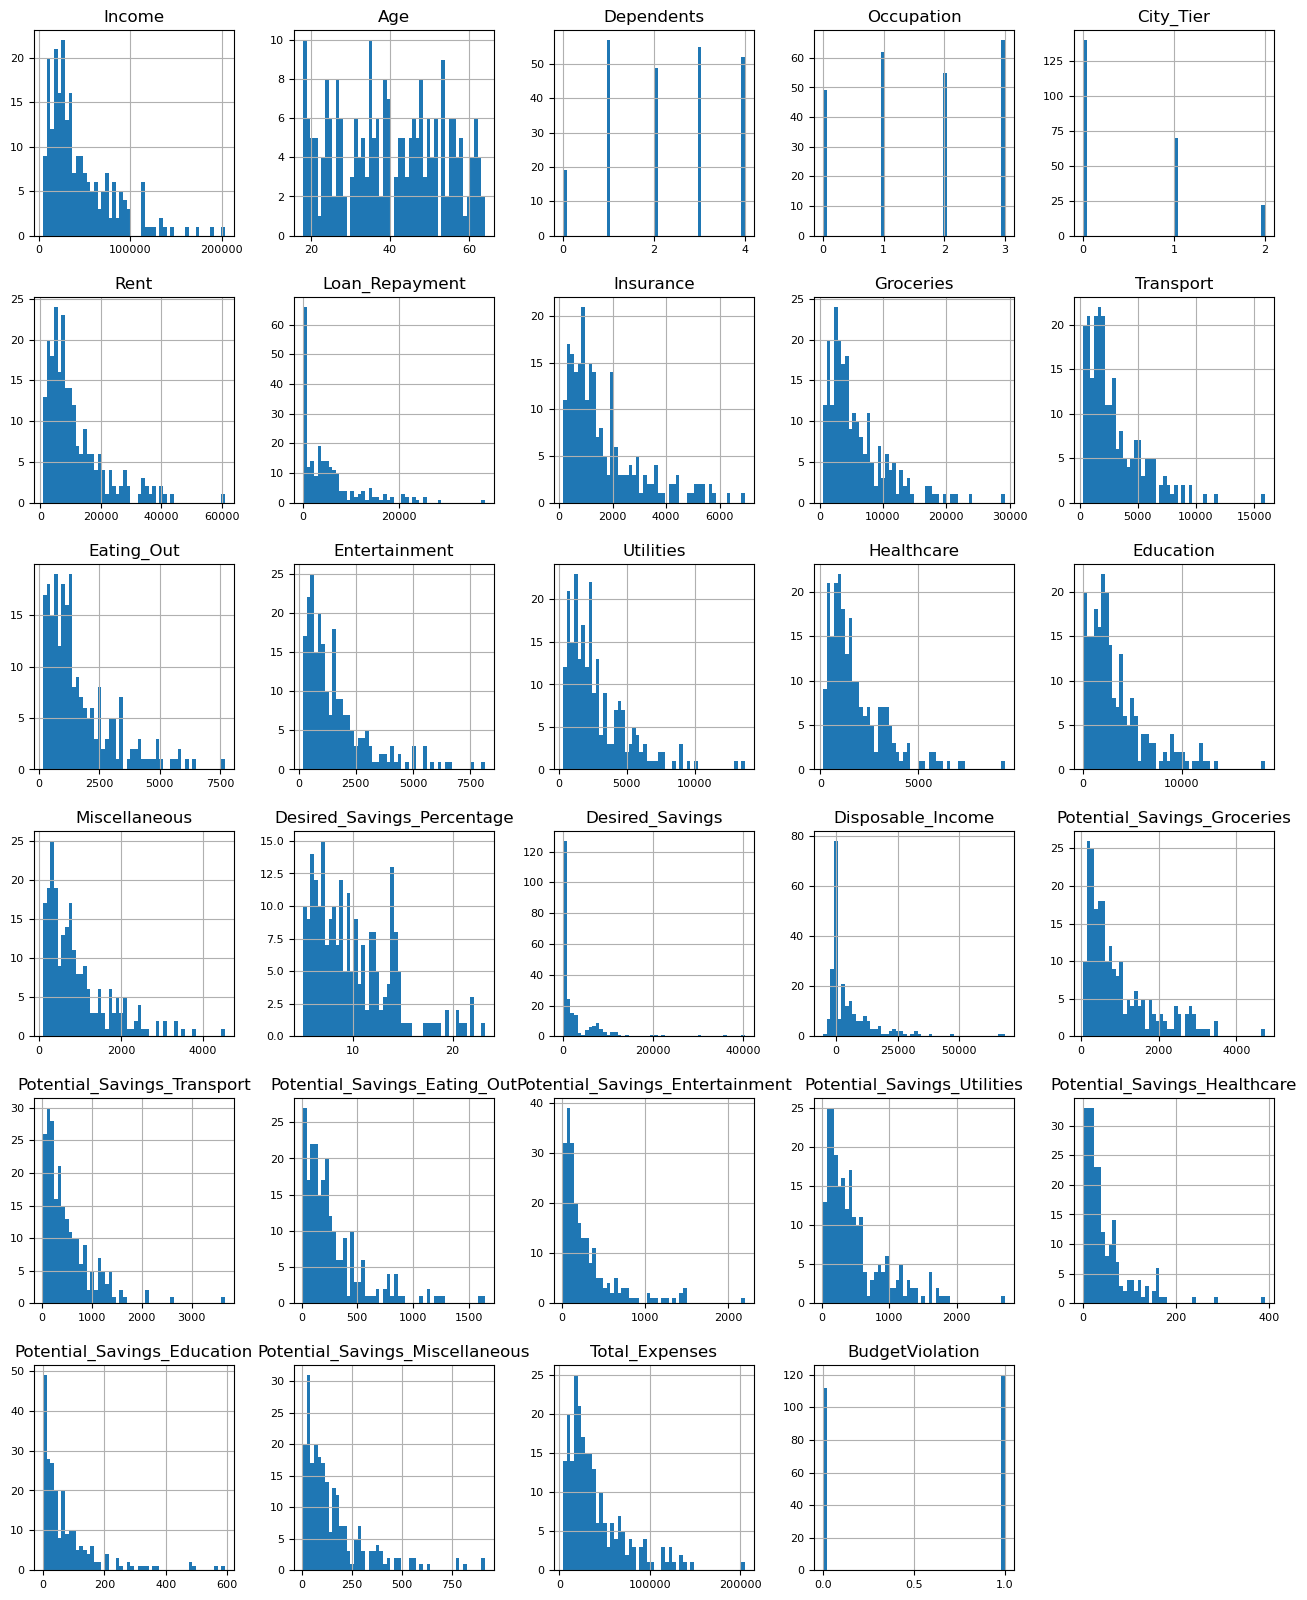

In [63]:
df_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

In [ ]:
sns.pairplot(df_num)
plt.show()

In [66]:
x=df.drop(['Desired_Savings_Percentage',
'Potential_Savings_Groceries',
           
'Desired_Savings',

'Disposable_Income',

'Potential_Savings_Transport',

'Potential_Savings_Eating_Out',

'Potential_Savings_Entertainment',

'Potential_Savings_Utilities',

'Potential_Savings_Healthcare',

'Potential_Savings_Education',

'Potential_Savings_Miscellaneous', 'BudgetViolation'],axis=1)
y=df['BudgetViolation']
print(x)
print(y)

           Income  Age  Dependents  Occupation  City_Tier          Rent  \
0    20228.115621   25           3           0          0   6068.434686   
1    57909.767101   48           1           3          1  11581.953420   
2    10058.648510   28           1           1          0   3017.594553   
3    34704.729633   53           1           0          0  10411.418890   
4    75802.479283   21           4           2          1  15160.495857   
..            ...  ...         ...         ...        ...           ...   
227  61972.690323   37           1           3          0  18591.807097   
228  26665.791312   40           4           1          1   5333.158262   
229  77548.161619   42           4           3          0  23264.448486   
230  13343.760949   61           3           3          0   4003.128285   
231   8235.778970   26           4           1          2   1235.366845   

     Loan_Repayment    Insurance     Groceries    Transport   Eating_Out  \
0       3447.182025   9

# Splitting into training and testing

In [69]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=43,stratify=y)

In [71]:
x_train.head()

,Income,Age,Dependents,Occupation,City_Tier,Rent,Loan_Repayment,Insurance,Groceries,Transport,Eating_Out,Entertainment,Utilities,Healthcare,Education,Miscellaneous,Total_Expenses
175,45977.565917,37,2,2,0,13793.269775,0.000000,2086.764189,5572.429922,3577.083459,1128.906093,1262.773602,2768.761734,1591.703758,4363.878714,1153.544075,37299.115323
197,9730.121295,51,2,1,1,1946.024259,0.000000,247.981679,1183.885071,505.034638,471.909731,436.570494,411.494040,347.622250,941.810097,143.205048,6635.537307
203,53498.501329,43,2,0,0,16049.550399,7673.232933,2623.583870,7970.610701,3444.330488,2500.697705,1588.336615,3697.423639,1873.089487,4991.641084,1156.267742,53568.764661
222,45232.295239,19,1,2,0,13569.688572,7866.640734,1965.577171,6066.899047,2926.367477,2231.073946,1125.548611,3237.048055,1634.428725,3858.715109,1272.664711,45754.652159
38,27794.161593,52,0,0,1,5558.832319,3501.961952,607.912983,3624.273570,1908.614164,661.334097,958.474732,1404.810831,1064.432950,0.000000,814.718979,20105.366575


In [73]:
y_train.head()

175    1
197    1
203    0
222    0
38     1
Name: BudgetViolation, dtype: int32

In [75]:
print(x_train.shape,y_train.shape,x_test.shape)

(174, 17) (174,) (58, 17)


# SVM

In [78]:
svc=SVC(kernel='linear')

In [80]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(x_train, y_train)

SVC()

In [82]:
x_train_pred=svc.predict(x_train)
train_accuracy=accuracy_score(x_train_pred,y_train)

In [84]:
print('train accuracy:',train_accuracy)

train accuracy: 0.8620689655172413


In [86]:
x_test_pred=svc.predict(x_test)
test_accuracy=accuracy_score(x_test_pred,y_test)
test_accuracy

0.8448275862068966

# Random Forest

In [89]:
rf=RandomForestClassifier(n_estimators=40)

In [91]:
rf.fit(x_train,y_train)

RandomForestClassifier(n_estimators=40)

In [93]:
x_train_pred=rf.predict(x_train)
train_accuracy=accuracy_score(x_train_pred,y_train)
print("train Accuracy =",train_accuracy)

train Accuracy = 1.0


In [95]:
x_test_pred=rf.predict(x_test)
test_accuracy=accuracy_score(x_test_pred,y_test)
test_accuracy

0.9655172413793104

# Logistic Regression

In [98]:
lr=LogisticRegression(max_iter=1000)
lr.fit(x_train,y_train)

LogisticRegression(max_iter=1000)

In [100]:
x_train_pred=lr.predict(x_train)
train_accuracy=accuracy_score(x_train_pred,y_train)
print("train Accuracy =",train_accuracy)

train Accuracy = 1.0


In [102]:
x_test_pred=lr.predict(x_test)
test_accuracy=accuracy_score(x_test_pred,y_test)
test_accuracy

1.0

# Gradient Boost

In [105]:
gb=GradientBoostingClassifier()
gb.fit(x_train,y_train)

GradientBoostingClassifier()

In [107]:
x_train_pred=gb.predict(x_train)
train_accuracy=accuracy_score(x_train_pred,y_train)
print("train Accuracy =",train_accuracy)

train Accuracy = 1.0


In [109]:
x_test_pred=gb.predict(x_test)
test_accuracy=accuracy_score(x_test_pred,y_test)
test_accuracy

0.9655172413793104

## Confusion Matrix and Evaluation Metrics

In [112]:
x_test_pred=lr.predict(x_test)
test_accuracy=accuracy_score(x_test_pred,y_test)
cm=confusion_matrix(x_test_pred,y_test)
print(cm)
report=classification_report(y_test,x_test_pred)
print(report)

[[28  0]
 [ 0 30]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        28
           1       1.00      1.00      1.00        30

    accuracy                           1.00        58
   macro avg       1.00      1.00      1.00        58
weighted avg       1.00      1.00      1.00        58



In [114]:
x_test_pred=svc.predict(x_test)
test_accuracy=accuracy_score(x_test_pred,y_test)
cm=confusion_matrix(x_test_pred,y_test)
print(cm)
report=classification_report(y_test,x_test_pred)
print(report)

[[28  9]
 [ 0 21]]
              precision    recall  f1-score   support

           0       0.76      1.00      0.86        28
           1       1.00      0.70      0.82        30

    accuracy                           0.84        58
   macro avg       0.88      0.85      0.84        58
weighted avg       0.88      0.84      0.84        58



In [116]:
x_test_pred=gb.predict(x_test)
test_accuracy=accuracy_score(x_test_pred,y_test)
cm=confusion_matrix(x_test_pred,y_test)
print(cm)
report=classification_report(y_test,x_test_pred)
print(report)

[[28  2]
 [ 0 28]]
              precision    recall  f1-score   support

           0       0.93      1.00      0.97        28
           1       1.00      0.93      0.97        30

    accuracy                           0.97        58
   macro avg       0.97      0.97      0.97        58
weighted avg       0.97      0.97      0.97        58



In [118]:
x_test_pred=rf.predict(x_test)
test_accuracy=accuracy_score(x_test_pred,y_test)
cm=confusion_matrix(x_test_pred,y_test)
print(cm)
report=classification_report(y_test,x_test_pred)
print(report)

[[27  1]
 [ 1 29]]
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        28
           1       0.97      0.97      0.97        30

    accuracy                           0.97        58
   macro avg       0.97      0.97      0.97        58
weighted avg       0.97      0.97      0.97        58



# Test v/s Train Chart

In [121]:
import pandas as pd
data = {
    'Model': ['Logistic Regression', 'Gradient Boost', 'Random Forest', 'SVM'],
    'Train Score': [1.0, 1.0, 1.0, 0.86],
    'Test Score': [1.0,0.96 ,0.93,0.84 ]
}
df = pd.DataFrame(data)

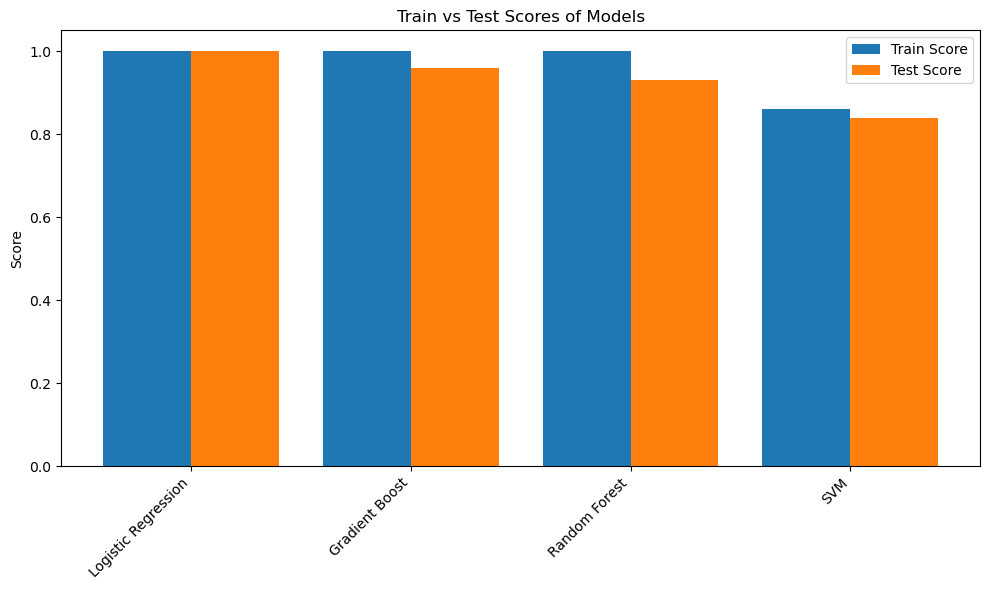

In [123]:
import matplotlib.pyplot as plt

# Set position of bars
x = range(len(df))

# Plot
plt.figure(figsize=(10, 6))
plt.bar(x, df['Train Score'], width=0.4, label='Train Score', align='center')
plt.bar([i + 0.4 for i in x], df['Test Score'], width=0.4, label='Test Score', align='center')

# Labels and formatting
plt.xticks([i + 0.2 for i in x], df['Model'], rotation=45, ha='right')
plt.ylabel('Score')
plt.title('Train vs Test Scores of Models')
plt.legend()
plt.tight_layout()
plt.show()

## Making a Prediciton System

In [126]:
input_data=[[34704.729633,53 ,1 ,0  ,0  ,10411.418890, 6928.178523,  1190.230196,
             4765.128511  ,2348.859695  ,1732.224614,1522.972281  ,2048.444784 , 1304.593630 ,2066.630322,940.707318,  
            35259.388764]]
occupation_label =l.inverse_transform([input_data[0][3]])[0]
city_label = l.inverse_transform([input_data[0][4]])[0]


# changing the input data into numpy array
input_data_as_numpy_array=np.asarray(input_data)

# reshape the array as we are predicting for an instance
input_data_reshape=input_data_as_numpy_array.reshape(1,-1)

prediction=lr.predict(input_data_reshape)
print(prediction)

if(prediction[0]==0):
    print("The Budget is ABOVE")
else:
    print("he Budget is BELOW")

[0]
The Budget is ABOVE


In [128]:
input_data=[[77548.161619 , 42 , 4 ,3, 0, 23264.448486 ,
            0.000000,  3387.217832 , 10491.684067,  5819.838040  ,2223.695394 , 
            3165.919531 , 4818.379808  ,3209.010207 , 7191.480375  ,  1469.174732  ,
              65040.848473  ]]
occupation_label =l.inverse_transform([input_data[0][4]])[0]
city_label = l.inverse_transform([input_data[0][4]])[0]


# changing the input data into numpy array
input_data_as_numpy_array=np.asarray(input_data)

# reshape the array as we are predicting for an instance
input_data_reshape=input_data_as_numpy_array.reshape(1,-1)

prediction=lr.predict(input_data_reshape)
print(prediction)

if(prediction[0]==0):
    print("The Budget is ABOVE")
else:
    print("he Budget is BELOW")

[1]
he Budget is BELOW


## Save to pickle file

In [131]:
import pickle

In [133]:
filename='trained_model.sav'
pickle.dump(lr,open(filename,'wb'))

In [135]:
# loading the saved model
loaded_model=pickle.load(open(filename,'rb'))
loaded_model

LogisticRegression(max_iter=1000)

# USER INTERFACE

In [138]:
import gradio as gr

In [139]:
import pickle
import numpy as np

# load sav file
model=pickle.load(open(r"C:\Users\sunu\trained_model.sav","rb"))

In [140]:
# define a Prediction Function
def predict_diabetes(Income,Age,Dependents,Occupation,City_Tier,Rent,Loan_Repayment,Insurance,Groceries,Transport,Eating_Out,Entertainment,Utilities,Healthcare,Education,Miscellaneous,Total_Expenses):
    input_data=np.array([Income,Age,Dependents,Occupation,City_Tier,Rent,Loan_Repayment,Insurance,Groceries,Transport,Eating_Out,Entertainment,Utilities,Healthcare,Education,Miscellaneous,Total_Expenses]).reshape(1,-1)
    prediction=model.predict(input_data)
    return "BELOW" if prediction[0]==1 else "ABOVE"

In [141]:
# Create Gradio Interface
iface=gr.Interface(
    fn=predict_diabetes,
    inputs=[
        gr.Number(label="Income"),
        gr.Number(label="Age"),
        gr.Number(label="Dependents"),
        gr.Number(label="Occupation"),
        gr.Number(label="City_Tier"),
        gr.Number(label="Rent"),
        gr.Number(label="Loan_Repayment"),
        gr.Number(label="Insurance"),
        gr.Number(label="Groceries"),
        gr.Number(label="Transport"),
        gr.Number(label="Eating_Out"),
        gr.Number(label="Entertainment"),
        gr.Number(label="Utilities"),
        gr.Number(label="Healthcare"),
        gr.Number(label="Education"),
        gr.Number(label="Miscellaneous"),
        gr.Number(label="Total_Expenses"),
         ],
    outputs="text",
    title="Budget Violation Prediction",
    description="Enter the parameters to predict Budget"
)

# Launch the interface
iface.launch()

* Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.
